<a href="https://colab.research.google.com/github/plajuan/ML_Study/blob/main/ModelEvaluation_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Evaluation

## Introduction

Many of the applications of supervised learning are geared towards making **predictions**. These predictions may be different in nature but, in general, they seek to anticipate what will happen through pattern recognition.

Therefore, the fourth step in solving problems with machine learning is to understand how good the prediction models are. For this, it is necessary to **evaluate the performance of the models**, to determine whether they have any practical use.

We can draw an **analogy** between evaluating the performance of models and what we do when studying for a test. When we are studying for a test, we try to solve exercises similar to those that will appear on the test in order to understand whether or not we are prepared. In machine learning it is the same: before we can say that a model is good, we have to test and evaluate it.

In this tutorial, we will introduce you to some aspects of model evaluation:

*   **Evaluation metrics**. There are several metrics that can be used to assess machine learning models.
*   **Cross-validation**. These techniques allow us to get a better estimate of the predictive capacity of the models.

The tutorial has several **examples** that demonstrate how code is applied and its effects. In addition, during the tutorial you will encounter various challenges to check whether you understand the material. At the end, all of the content presented will be summarised.

Note that this is an **introductory-level** tutorial and for this reason, several important aspects are not covered. For more information, we recommend that you consult the [scikit-learn library official documentation](https://scikit-learn.org/stable/) and read the books used as references for this chapter:

*   Müller, A.C. e Guido, S., 2016. *Introduction to Machine Learning with Python: A Guide for Data Scientists*. O'Reilly Media, Inc.
*   Raschka, S. e Mirjalili, V., 2019. *Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow*. Packt Publishing Ltd.

##Evaluation metrics

In previous tutorials and solved exercises, we evaluated the performance of machine learning models using two metrics:

*   **Success rate**, whenever we were faced with classification problems.
*   **Coefficient of determination**, whenever we were faced with regression problems.

However, there are **other metrics** to assess the performance of models.

Choosing an evaluation metric to determine a model's performance **depends on the problem we are solving**. For example, if we are developing a model to detect serious illnesses, it is preferable to identify all patients with a serious illness, even if this means making some incorrect predictions (and thereby reducing the success rate). Any other solution could lead to a person who is ill not receiving the necessary treatment (which could have serious consequences). Therefore, we can see that there are situations where, given the nature of the problem, the success rate is not the best evaluation metric for performance.

In this chapter, we will present some alternative performance evaluation metrics for **classification** and **regression** problems.

### Classification

To make the concepts easier to understand, we will analyse performance evaluation metrics by considering **two-class classification problems** (binary classification). In this type of problem, it is common to use the terms ‘positive’ and ‘negative’ to describe the two existing classes. For example, if the problem is to predict which students will pass at the end of the year, we say that a student is classified as 'positive' if the model predicts that they will pass. Conversely, a student is classified as 'negative' if the model predicts that they will fail at the end of year.

When we address two-class classification problems, there are **four possible scenarios**:

*   **True positives (TP)**. The model says something is positive and its prediction is correct.
*   **True negatives (TN)**. The model says something is negative and its prediction is correct.
*   **False positives (FP)**. The model says something is positive and its prediction is incorrect.
*   **False negatives (FN)**. The model says something is negative and its prediction is incorrect.

The following table describes each of these scenarios, applying them to the case of students who will pass the year.

In [ ]:
# Generate the table
import pandas as pd

scenarios = pd.DataFrame({'Name': ['True positives (TP)',
                                   'True negatives (TN)',
                                   'False positives (FP)',
                                   'False negatives (FN)'],
                        'Description': ['The model says something is positive and its prediction is correct.',
                                      'The model says something is negative and its prediction is correct.',
                                      'The model says something is positive and its prediction is incorrect.',
                                      'The model says something is negative and its prediction is incorrect.'],
                        'Example': ['The model predicts that the student will pass and they pass.',
                                    'The model predicts that the student will fail and they fail.',
                                    'The model predicts that the student will pass but they fail.',
                                    'The model predicts that the student will fail but they pass.']})
scenarios

,Name,Description,Example
0,True positives (TP),The model says something is positive and its p...,The model predicts that the student will pass ...
1,True negatives (TN),The model says something is negative and its p...,The model predicts that the student will fail ...
2,False positives (FP),The model says something is positive and its p...,The model predicts that the student will pass ...
3,False negatives (FN),The model says something is negative and its p...,The model predicts that the student will fail ...


It is common to represent these scenarios in a matrix which we call a **confusion matrix**. A generic confusion matrix is presented in the next figure:

<center><img src="https://github.com/pmarcelino/images/blob/master/mat-confusao-generica.png?raw=true" width="300">

This matrix must be filled with the number of observations that exist in each scenario. For example, let us imagine a situation where we have:

*   10 observations TN.
*   20 observations FP.
*   15 observations FN.
*   12 observations TP.

In this case, the confusion matrix would look like the following:

<center><img src="https://github.com/pmarcelino/images/blob/master/mat-confusao-numerica.png?raw=true" width="300">

In this matrix, the **main diagonal** (TN and TP) tells us how many times the model made correct predictions, while the **remaining cells** (FP and FN) tell us how many times the model made incorrect predictions.

To **illustrate how a confusion matrix is created** in *scikit-learn*, we will use the `diabetes` dataset. The problem we intend to solve using this dataset, which contains patient clinical information (e.g., blood pressure), is to predict whether or not a patient has diabetes. The example follows the standard process for building machine learning models and at the end shows how a confusion matrix is created.

In [ ]:
# Import libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Import data
url = 'https://raw.githubusercontent.com/pmarcelino/datasets/master/diabetes.csv'
df = pd.read_csv(url)

In [ ]:
# Define independent and dependent variables
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Define the algorithm of the model
model = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[96, 27],
       [24, 45]])

In the previous instructions:

*   We have the various instructions for the standard process for building machine learning models.
*   `confusion` is the variable where we store our confusion matrix.
*   `confusion_matrix()` is the function that creates the confusion matrix.
  *   `y_test` is the first argument of the `confusion_matrix()` function and defines the real values (whether or not a patient has diabetes).
  *   `y_pred` is the second argument of the `confusion_matrix()` function and defines the estimated values (our prediction about whether or not a patient has diabetes).

Upon executing these instructions, we get a confusion matrix with:

*   96 observations classified as TN.
*   27 observations classified as FP.
*   24 observations classified as FN.
*   45 observations classified as TP.

A confusion matrix is important because we can obtain **several performance metrics** for classification models. In particular, we can get:

*   Success rate.
*   Precision.
*   Sensitivity.
*   F-score.
         
          

#### Success Rate

As we know, the success rate is calculated by **dividing the number of observations the model predicts correctly by the total number of existing observations**. Therefore, we can express the success rate as a function of the following confusion matrix values:

<br>
<center>$\text{Taxa de acerto} = \frac{VP + VN}{VP+VN+FP+FN}$ </center>


To evaluate the success rate using *scikit-learn* we follow the same process as seen before:   

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.734375

#### Precision

Precision evaluates **how many observations classified as positive were actually positive**. In other words, accuracy allows us to assess how accurate our model is in predicting positive cases. Mathematically, and depending on the values of the confusion matrix, the precision is given by:

<br>
<center>$\text{Precisão} = \frac{VP}{VP+FP}$</center>

Typically, precision is used when our **goal is to limit the number of false positives**. For example, if we are working for a pharmaceutical company and they want a model that predicts how many times a particular drug can cure a certain disease, we will want to use precision as the evaluation metric. Since the development of new drugs is expensive, pharmaceutical companies will want to guarantee that the drugs work before advancing to large-scale production. Therefore, it is advantageous to have a model that gives few false positives (cases where we say that the drug cures the disease but, in reality, it does not).

Precision can be evaluated using *scikit-learn* in the following way:


In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.625

#### Sensitivity

Sensitivity evaluates the **percentage of positive cases identified** by the model. In other words, it allows us to assess the model's ability to find all the positive cases. This metric can be obtained through the following expression:

<br>
<center>$\text{Sensibilidade} = \frac{VP}{VP+FN}$</center>

Sensitivity is commonly used in cases where **we want to minimise the number of positive cases not identified by our model**. For example, if we are creating a model to detect a serious illness, we will want our model to identify as many positive cases as possible (even if this means increasing the number of FP). The inherent risk of not identifying a serious illness can be fatal for the patient and, therefore, we want to avoid this risk.

To determine the sensitivity using *scikit-learn*, we do the following:

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.6521739130434783

It is important to know how to **distinguish sensitivity from precision** because when one improves, the other normally worsens:

*   **Prioritising sensitivity** means that if we are in doubt as to whether a case is positive or negative, we will say that the case is positive. This can lead to a reduction in model accuracy because we were not very selective when classifying a given case as positive.
*   By contrast, **prioritising precision** means that if we are in doubt as to whether a case is positive or negative, we will say that the case is negative. This can lead to a reduction in sensitivity because we were very selective when classifying a given case as positive.

#### F-score

The F1-score is intended to **take into account accuracy and sensitivity**. Since this metric considers both precision and sensitivity, it is especially suitable for situations where we intend to generally evaluate the model's performance. The F1-score can be obtained through the following expression:

<br>
<center>$\text{F1} = 2 \times \frac{\text{precisão} \times \text{sensibilidade}}{\text{precisão} + \text{sensibilidade}}$</center>

Its calculation in *scikit-learn* is done as follows:

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.6382978723404256

###Regression

As with classification problems, there are also **various evaluation metrics** that can be used in regression problems.

The main **evaluation metric** is the coefficient of determination. However, for referencing purposes, two other evaluation metrics (the mean absolute error and the mean squared error) are also mentioned in the following chapters.

#### Coefficient of determination

In practice, the **coefficient of determination (R2) is used quite often** in regression problems. Mathematically, R2 is calculated using the following formula:

<br>
<center>
$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$</center>

where $y$ and $\hat{y}$ are the real and estimated values, respectively.

In practical terms, the most important thing is to know that:

*   The maximum value of R2 is 1.
*   The closer the the R2 value is to 1, the better the model is.   

In *scikit-learn*, R2 can be calculated as demonstrated in the following **example**. This example solves a problem using the `boston-housing` dataset, which contains information about the housing market. The goal is to use this information to predict house prices.

In [ ]:
# Import libraries
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [ ]:
# Import data
url = 'https://raw.githubusercontent.com/pmarcelino/datasets/master/boston-housing.csv'
df = pd.read_csv(url)

In [ ]:
# Define independent and dependent variables
X = df.drop('medv', axis=1)
y = df['medv']

In [ ]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Define the algorithm of the model
model = RandomForestRegressor(random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using the coefficient of determination as the metric
r2_score(y_test, y_pred)

0.7842593634216501

#### Mean absolute error

The mean absolute error (MAE) is given by the expression:

<br>
<center>
$\text{EMA}(y, \hat{y}) = \frac{1}{n_{\text{observações}}} \sum_{i=0}^{n_{\text{observações}}-1} \left| y_i - \hat{y}_i \right|.$</center>

where $y$ and $\hat{y}$ are the real and estimated values, respectively.

To calculate the MAE in *scikit-learn*, you do the following:

In [ ]:
# Evaluate the model using the mean absolute error as the metric
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

2.597393700787403

When applying the MAE, we want its value to be as low as possible.

#### Mean squared error

The mean squared error is given by the expression:

<br>
<center>
$\text{EQM}(y, \hat{y}) = \frac{1}{n_\text{observações}} \sum_{i=0}^{n_\text{observações} - 1} (y_i - \hat{y}_i)^2.$</center>

where $y$ and $\hat{y}$ are the real and estimated values, respectively.

To calculate the MSE in *scikit-learn*, you do the following:  

In [ ]:
# Evaluate the model using the mean squared error as the metric
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

17.62579759842521

When applying the MSE, we want its value to be as low as possible.

##Cross-validation

**Evaluating the performance of models** is an essential phases in the process of building machine learning models. In our context, the greater a model's ability to predict what will happen in new situations (situations that are different from those seen during the training process), the better the model. Guessing what is going to happen is what we expect a predictive model to do.

In the previous chapters, we looked at the **different ways we can evaluate** predictive models. Although each method was different, they all followed the same structure. Namely, the dataset was divided into training and test datasets, where the first was used to train the model and the second to test the model, as illustrated in the following example:

In [ ]:
# Import libraries
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
# Import data
url = 'https://raw.githubusercontent.com/pmarcelino/datasets/master/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Define the independent and dependent variables
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Define the algorithm of the model
model = RandomForestClassifier(random_state=0)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using the success rate as the metric
accuracy_score(y_test, y_pred)

0.9736842105263158

In the previous example, we started by separating the original dataset into a training dataset and a test dataset. We then trained the model using the training dataset and evaluated the model by seeing how well it worked when applied to the test dataset. By doing this, we were able to **simulate how the model would behave when faced with a new situation** (a situation where the observations were different from those seen during the training process).

While this approach makes sense, it has **limitations**. Suppose that upon (randomly) separating the original dataset into a training dataset and a test dataset, **all the 'hard-to-learn' examples remain in the training dataset**. We would be very lucky in this case because this would mean that all the 'easy' examples would be in the test dataset. Therefore, when we apply the model to the test dataset, the model would easily be able to make predictions and we would conclude that the model had a high performance.

The opposite could also happen. If by chance, **all the 'easy-to-learn' examples were in the training dataset** and all the difficult examples were in the test dataset, we would conclude that our model had a lot of difficulty making predictions. As such, we would conclude that the model had low performance.

A **similar situation happens to us at school**:

*   When studying for a test, if we only do difficult exercises and therefore we are constantly making mistakes, our confidence in our ability to get a good mark on the test will be low (when in fact, we may actually be well prepared).
*   Conversely, if we only do easy exercises, we may overestimate what we know and become overly confident in our ability to get a good mark on the test (when in fact, we may actually be poorly prepared).

In both cases, we have a problem because there is a **discrepancy between the reality during training and the reality during testing**.

To solve this problem, we can use **cross-validation**. This is a statistical technique that helps us to obtain more reliable estimates of the predictive capacity of models, which, in essence, involves evaluating their ability to make correct predictions when applied to new situations.

There are **several ways to apply** cross-validation. In this chapter, we will look at two of the main methods:

*   *K*-fold cross-validation.
*   Stratified cross-validation.

### K-fold cross-validation

**K-fold cross-validation** is one of the most commonly used forms of cross-validation. In general, this is the form of cross-validation that we will want to apply to **regression** problems.

The following steps describe how *k*-fold cross-validation is applied:

1.   We start by **defining a value for *k*** (hence the *k iterations*). Typically, the values 5 (when we have a large dataset) or 10 (when we have a small dataset) are used. For illustrative purposes, let us assume that `k=5`.
1.   The next step is to **divide the dataset into *k* equal parts**. Since we said `k=5`, we need to divide the dataset into five equal parts (1, 2, 3, 4 and 5).
1.   Next, we take **four of these parts** (2, 3, 4, and 5) and we will consider that our training dataset comprises the data contained within these four parts. The **test dataset** will be what corresponds to the **remaining part** (1).
1.   Now, we will follow the **usual procedure**. We will use the training dataset to train the model and the test dataset to evaluate the model. Thus, we get an estimate of the model's performance.
2.   With this done, we return to step 3 and repeat the process. However, now we have to **change the parts**. For example, we use the data from parts 1, 3, 4 and 5 to train the model and the data from part 2 to test the model. After that, we carry out the instruction outlined in point 4, thereby obtaining a new estimate of the model's performance.
2.   We proceed as described in point 5 until **all five parts have been used**, once only, as a **test dataset**.
2.   At the end, we evaluate the performance of our model as being the **average of the performance estimates** obtained during the process described above. In this case, it would be the average of the five estimates calculated over the five iterations.

Visually, what we are saying is:

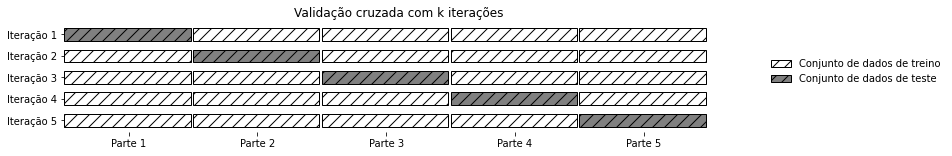

The application of *k*-fold cross-validation through the *scikit-learn* library is done using the `cross_val_score()` function, as indicated below:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X, y)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In the previous instruction:

*   `from sklearn.model_selection import cross_val_score` allows us to import the *scikit-learn* library module where the `cross_val_score()` function is located.
*   `from.sklearn.ensemble import RandomForestClassifier` and `model = RandomForestClassifier()` are instructions that we are already familiar with and that are related to the construction of the model using the Random Forest algorithm.
*   `scores` is the variable where we will store the estimates of the model's performance.
*   `cross_val_score(model, X, y)` is the function that performs cross-validation.
  *   The first parameter (`model`) indicates the algorithm that we will use in each of the iterations to build the predictive model.
  *   The second parameter (`X`) refers to the independent variables.
  *   The third parameter (`y`) refers to the dependent variable.

So, as we can see, one of the main differences here is that when using the `cross_val_score()` function, we no longer need to explicitly split the original dataset into a training dataset (`X_train`) and test dataset (`X_test`). This process is done automatically by the `cross_val_score()` function.

One of the benefits of using *k*-fold cross-validation is that we get **more reliable estimates** of the performance of our models. *K*-fold cross-validation runs various simulations where it applies the model to different datasets, thereby giving us a more complete insight into the model's behaviour. Therefore our confidence in the model's performance is greater.

Going back to the **test analogy**, below we can see the difference between the performance evaluation methodology that was previously applied and the methodology based on the use of *k*-fold cross-validation:

*   **Previously applied methodology**. This methodology corresponds to studying for a test and, during our studying, doing **a test** from previous years whose result we can use as an estimate of the mark we will get on the test for which we are studying.
*   ***K*-fold cross-validation**. This methodology corresponds to studying for a test and, during our studying, doing **various tests** from previous years and then using the average of the tests' results as an estimate of the mark we will get on the test for which we are studying.

Because it has a greater number of simulations, the methodology based on *k*-fold cross-validation is more robust and we are more confident in the estimate of the mark we will get.

In addition to increasing the confidence of the estimates of models' performance, using *k*-fold cross-validation also provides us with **information about how sensitive the model is** to changes in the training and test datasets.

As an **example**, we will use two classification models whose success rate estimates were obtained using cross-validation with k=5 iterations, as described in the following table:



In [ ]:
# Generate table
scores_example = pd.DataFrame({'Estimate 1': ['70%','95%'],
                               'Estimate 3': ['75%','70%'],
                               'Estimate 4': ['80%','80%'],
                               'Estimate 5': ['75%','55%'],
                               'Final Estimate': ['75%','75%']})
scores_example

,Estimate 1,Estimate 3,Estimate 4,Estimate 5,Final Estimate
0,70%,75%,80%,75%,75%
1,95%,70%,80%,55%,75%


This example illustrates the sensitivity of models to changes in the training and test datasets. Although both models have the same final estimate of success (75%), the truth is that **Model A is more stable than Model B** because its predictive capacity has smaller fluctuations (the values are always between 70% and 80%) than the predictive capacity of Model B (the values range between 55% and 95%).

This means that **Model A is has low sensitivity to changes** in the training and test datasets (regardless of the dataset, its performance is always similar), whereas **Model B is sensitive to these changes** (its performance is different for the training and test datasets). Therefore by applying *k*-fold cross-validation, we are able to conclude that **Model A is preferable**.

Finally, it should be noted that the biggest **disadvantage of *k*-fold cross-validation** is its computational cost, which increases as the *k* value increases. By using *k*-fold cross-validation, we are training *k* models instead of one model (as we did before). Consequently, the code takes approximately *k* times longer to execute and its computational cost increases.

###Stratified cross-validation

While *k*-fold cross-validation is a more reliable way to assess the performance of prediction models, there are cases where it does not work as well. Evaluating the performance of **classification** models, for example, is one such case.

So let us look at the following situation:

In [ ]:
with pd.option_context('display.max_rows', None):  # To forcingly print all cases
    print(y)

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
5          setosa
6          setosa
7          setosa
8          setosa
9          setosa
10         setosa
11         setosa
12         setosa
13         setosa
14         setosa
15         setosa
16         setosa
17         setosa
18         setosa
19         setosa
20         setosa
21         setosa
22         setosa
23         setosa
24         setosa
25         setosa
26         setosa
27         setosa
28         setosa
29         setosa
30         setosa
31         setosa
32         setosa
33         setosa
34         setosa
35         setosa
36         setosa
37         setosa
38         setosa
39         setosa
40         setosa
41         setosa
42         setosa
43         setosa
44         setosa
45         setosa
46         setosa
47         setosa
48         setosa
49         setosa
50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
55     ver

As we can see, the **data is grouped by class**:

*   First we have the data for the 'setosa' class.
*   Then we have the data for the 'versicolor' class.
*   And finally, we have the data for the 'virginica' class.

If we applied cross-validation with `k=3` iterations to this dataset, what would happen?

Assuming that, on the first iteration, part 1 and 2 gave us the training dataset and part 3 gave us the test dataset, we would then have a model **unable to make accurate predictions** because, during training, it would never see observations from the 'virginica' class (the number of observations of each species is equal and ordered, meaning that each of the three parts only contains one species' observations). This means that the model would have no way of knowing the characteristics of an observation from the 'virginica' class and, therefore, it would have no way of predicting a new observation as belonging to the 'viginica' class. This situation would also occur for the remaining iterations, which would make us believe that it would be impossible to create a prediction model to solve the problem. Something that **is not true**.

The way to solve this problem is to use a technique called **stratified cross-validation**. In this technique, we separate the training and test datasets in a similar way to how it is done in *k*-fold cross-validation, but with one difference: the division is done in such a way as to ensure that the proportion of observations in each part is similar to the proportion of observations in each class. For example, if 70% of our observations are from the 'versicolor' class and 30% are from the 'virginica' class, then stratified cross-validation ensures that each of the *k* parts has 70% of its observations from the 'versicolor' class and 30% from the 'virginica' class.

Visually, we can show it in the following way:

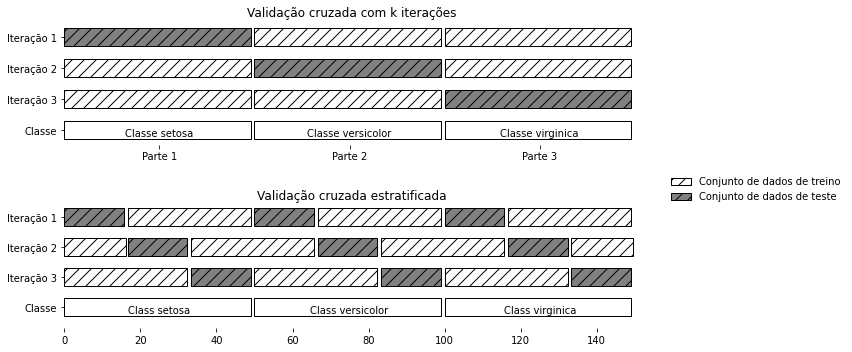

It is recommended to use the stratified cross-validation method instead of *k*-fold cross-validation when solving **classification** problems. However for regression problems it is customary to use *k*-fold cross-validation because the issue of differences in the proportion of observations does not factor into these problems.

By default, *scikit-learn* applies stratified cross-validation to classification problems and applies *k*-fold cross-validation when we are dealing with a regression problem. As such, **we do not have to worry about this issue when we are programming**, all we have to do is apply the `cross_val_score()` function.

## Summary

In this tutorial we looked at:

*   **Evaluation metrics**. There are several metrics to assess the performance of classification models. The use of these metrics depends on the problem we want to solve. Likewise, there are also several metrics to assess the performance of regression models. Here, however, the coefficient of determination (R2) is predominantly used as the evaluation metric for performance.
*   **Cross-validation**. We covered two types of cross-validation, *k*-fold cross-validation and stratified cross-validation. The first applies to regression problems and the second to classification problems.

Now that we have covered these concepts, we have concluded our presentation of the different phases of the standard process for building machine learning models and we are ready to solve any kind of prediction problem.